# **Red Bull Batalla de los Gallos**
Es un evento organizado por Red Bull desde el año 2005. ... Por excelencia, es la competencia de freestyle más reconocida que reúne a los MCs ganadores de las competiciones organizadas por Red Bull en cada país, enfrentándose en una sede determinada.
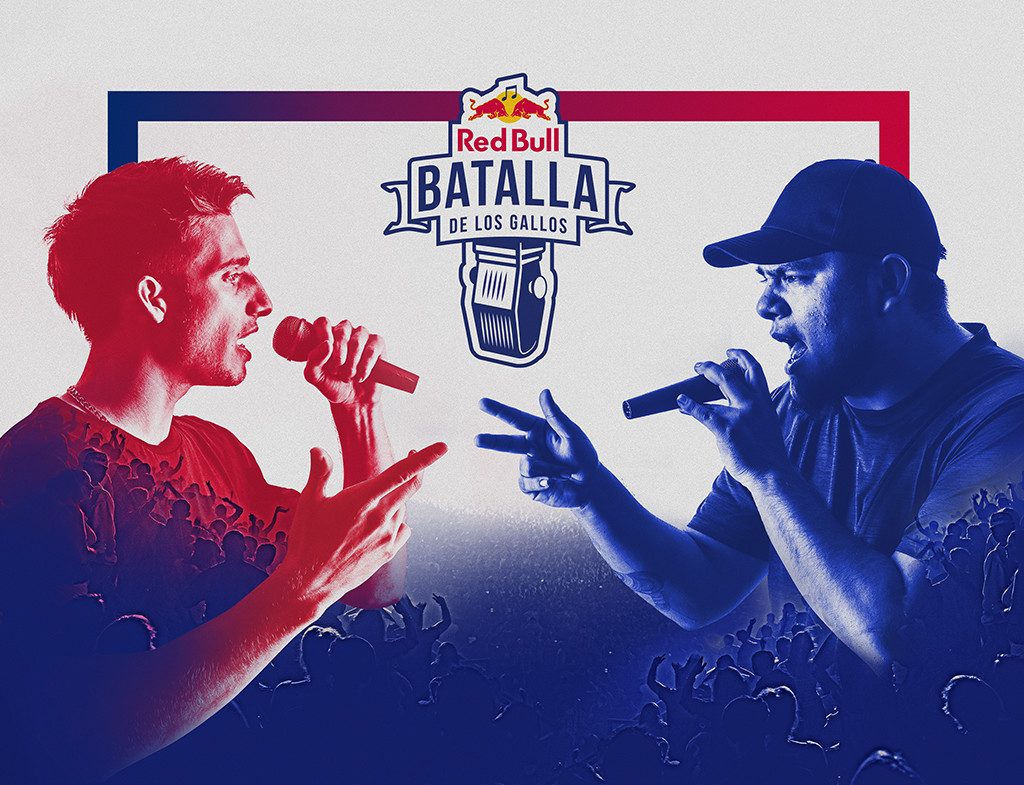

El sabado 21 de Noviembre, se realizo la final nacional, donde el campeón fue TATA. y Twitter Exploto el hashtag #RedBullArgentina, donde en este documento, hicimos un Scrapper con todos los hashtags de esa Red Bull, he hice una grafica con el logo de RED BULL.
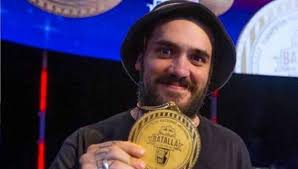

In [83]:
import tweepy 
import pandas as pd
import csv
import nltk as nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
consumer_key = ''
consumer_secret = ''
access_token_key = ''
access_token_secret = ''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Funcion para tener conexion con la API de Twitter
def api_connection():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token_key, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
    try:
        api.verify_credentials()
        print('Auth Ok!')
    except Exception:
        print('Error!')
    return api
#Funcion par extraer los Hashtags
def extract_tweets(hashtag, count):
    api = api_connection()
    tweets = []
    for tweet in tweepy.Cursor(api.search, q=hashtag, lang='es', include_rts=False).items(count):  
        if (not tweet.retweeted and 'RT @' not in tweet.text):
            tweets.append(tweet.text)
    return tweets

In [3]:
#Creacion de DataFrame he iniciando la funcion extract_tweets
tweets = extract_tweets('#RedBullArgentina', 50)
df = pd.DataFrame(data=tweets, columns=['text'])

Auth Ok!


In [17]:
#Limpiando el texto
def transform(text):  
    stopWords = set(stopwords.words('spanish'))
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # Remover menciones 
    text = re.sub(r'RT[\s]', ' ', text) #Remover RTs
    text = re.sub(r'#', ' ', text) # Remover # en el tweet
    text = re.sub(r'https?:\/\/\S+', ' ', text) #Remover links

    words = text.lower().split()

    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in words]
    no_garbage = [w for w in stripped if not w in stopWords]

    return (" ".join(no_garbage))

In [18]:
df['text'] = df['text'].apply(transform)

In [41]:
text = ' '.join(df['text'])
text

'cita puntua participación cada redbullargentina 🇦🇷 tata 9 wolf 7 acru 7 dani 5 klan 7 mech… participación cada redbullargentina 🇦🇷 tata 97 wolf 95 acru 75 dani 5 klan 8… cita puntua participación cada redbullargentina 🇦🇷 tata 9 wolf 85 acru 8 dan… redbullargentina respeto menuda mierda host 😅 sigo soñando final acru dani 🎤 redbullargentina cita puntua participación cada redbullargentina 🇦🇷 tata 85 wolf 95 acru 9 dani 6 klan 8… cita puntua participación cada redbullargentina 🇦🇷 tata 95 wolf 95 acru 7 d… cita puntua participación cada redbullargentina 🇦🇷 tata wolf acru dani klan mecha sub na… redbullargentina redbullbatalla 🔻 🔻 vez pudo ser triunfo alegría corondino ramiro ve… batalla tata mp redbullargentina hicimos yankees rapear castellano olvidó sos tataaa redbullbatalla redbullargentina tata pensó pensamos aún hoy sigo explicarme pasó privado a… después comer 1600 termino ver nacional redbullargentina cuartos dejamos… reacción misma sub 😖 redbullargentina mp gano coraaa  nivel redb

In [68]:
#Incluyengo palabras que no desamos y cargando la direccion de la imagen para la grafica
import numpy as np
from PIL import Image
path = 'batalla-de-gallos.png'
stopwords=['cita puntua','los','las','en','cada','en','1','2','3','4','5','6','7','8','9',
           '95','vez','ser','aún','pasó','na','ahi','ver','playstation5gratis','mierda','sus']

In [81]:
mask = np.array(Image.open(path)) #Creacion de mascara con la imagen
wordcloud_redbull = WordCloud(
    width=1024, height=800, mask=mask,
    min_font_size= 14, 
    stopwords=stopwords).generate(text)

In [78]:
#Funcion para el color de letra
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

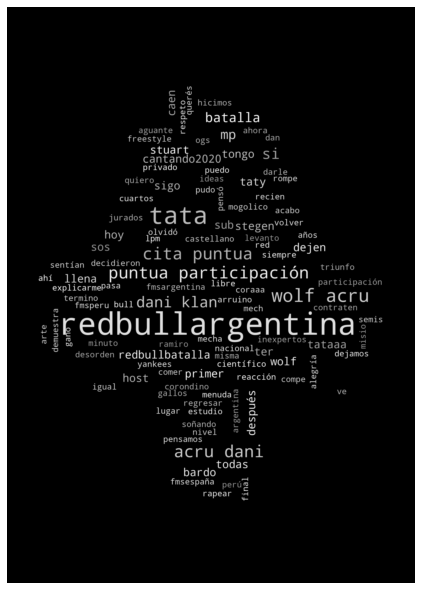

In [82]:
#Creacion de grafica
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_redbull.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()